Clasificación.
Problema de clasificación binaria., Fuente Exámen Parcial

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib as mpl
#plt.style.use('ggplot')

In [35]:
df_train = pd.read_csv('Data Set/aps_failure_training_set.csv',na_values='na')
df_test = pd.read_csv('Data Set/aps_failure_test_set.csv', na_values='na')

In [36]:
print('df_train:',df_train.shape)
df_train.head()

df_train: (60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [37]:
#df_train["ee_002"].hist()

In [38]:
print('df_test:',df_test.shape)
df_test.head()

df_test: (16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [39]:
feature_columns = df_train.drop(columns=['class']).columns.values
df_train[feature_columns]=df_train[feature_columns].fillna(df_train.mean())
df_test[feature_columns]=df_test[feature_columns].fillna(df_test.mean())
#df_train[feature_columns].isnull()

In [40]:
#filtered_data.fillna(filtered__data.mean()).dropna(axis=1, how='all')
df_train['target'] = df_train['class'].replace ({'neg':1, 'pos':0})
df_test['target'] = df_test['class'].replace ({'neg':1, 'pos':0})
print( 'df_train target:'), print(df_train['target'].value_counts())
print( 'df_test target:'), print(df_test['target'].value_counts())

df_train target:
1    59000
0     1000
Name: target, dtype: int64
df_test target:
1    15625
0      375
Name: target, dtype: int64


(None, None)

In [41]:
from sklearn.model_selection import train_test_split

X = df_train[feature_columns]
y = df_train['target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
print('X_train:', X_train.shape); print('y_train:', y_train.shape)
print('X_val:', X_val.shape); print('y_val:', y_val.shape)


X_train: (54000, 170)
y_train: (54000,)
X_val: (6000, 170)
y_val: (6000,)


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA().fit(X_train_scaled)
pca_loadings = pca.components_
pca_scores = pca.transform(X_train_scaled)

assert np.isclose(X_train_scaled, pca_scores @ pca_loadings).all(), 'Error al calcular pca_scores o pca_loadings'

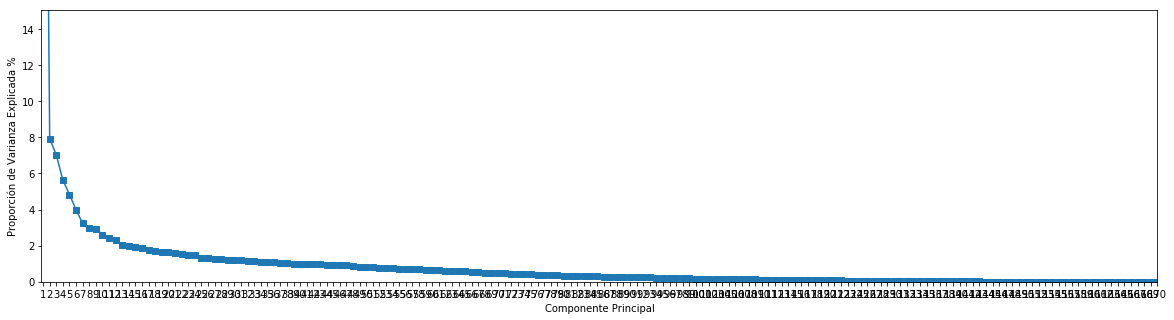

In [43]:
def plot_pca_exp_var(pca_exp_var):
    num_components = pca_exp_var.shape[0]
    indices = range(1, num_components + 1)
    plt.figure(figsize=(20,5))
    plt.plot(indices, pca_exp_var, '-s')
    plt.ylabel('Proporción de Varianza Explicada %')
    plt.xlabel('Componente Principal')
    plt.xlim(0.75,4.25)
    plt.ylim(0,15.05)
    plt.xticks(indices)
    plt.show()
    
pca_exp_var = pca.explained_variance_
plot_pca_exp_var(pca.explained_variance_)

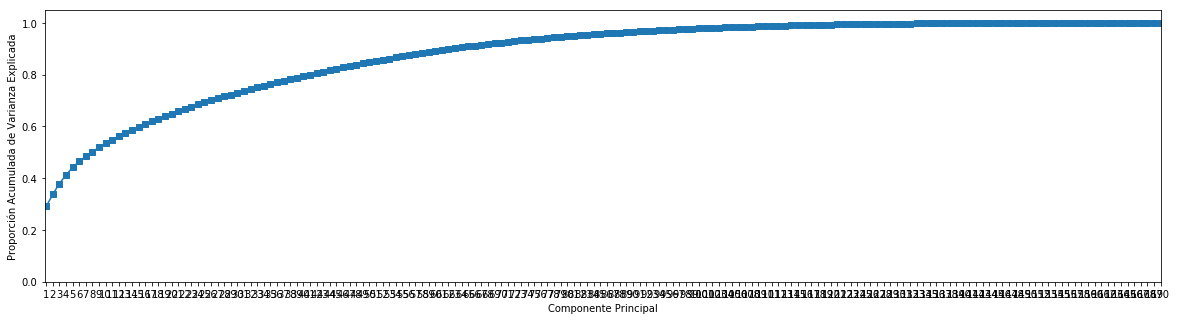

In [44]:
def plot_pca_cum_var(pca_cum_var):
    num_components = pca_cum_var.shape[0]
    indices = range(1, num_components + 1)
    plt.figure(figsize=(20,5))
    plt.plot(indices, pca_cum_var, '-s')
    plt.ylabel('Proporción Acumulada de Varianza Explicada')
    plt.xlabel('Componente Principal')
    plt.xlim(0.75,4.25)
    plt.ylim(0,1.05)
    plt.xticks(indices)
    plt.show()
    
PVE = pca.explained_variance_ratio_
pca_cum_var = np.cumsum(PVE)
plot_pca_cum_var(pca_cum_var)


In [45]:
# parte de la estrategia de reducción de dimensionalidad se resolveria con tomar las primeras 110 clases
print('PVE acumulada de los primeros 110 componentes principales: %.4f' % pca_cum_var[110] )

PVE acumulada de los primeros 110 componentes principales: 0.9883


In [46]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# se debe estavlecer sistema de optimización para reducción de Falsos negativos, ya sea por sistemas de pesos o por aumento de la probabilidad de aciertos en True negative


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#probabilidad de que cada una de las observaciones de conjunto de * validación* corresponda a la clase positiva (diagnóstico maligno).
probabilidades_val = modelo.predict_proba(X_val)[:,1]
probabilidades_val

array([0.76434521, 0.59648756, 0.59403433, ..., 0.59544387, 0.78281924,
       0.61965591])

In [62]:
from sklearn import metrics

predicciones_val = modelo.predict(X_val)
num_predicciones_correctas = (y_val == predicciones_val).sum()
num_total_de_muestras = len(y_val)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

Predicciones correctas :  5911
Número de muestras     :  6000
Exactitud (manual)     :  0.9851666666666666


In [65]:
from sklearn.metrics import confusion_matrix
def print_binary_confusion_matrix(matrix):    
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')

In [66]:
predecido = predicciones_val
matriz = confusion_matrix (y_val, predecido)

accuracy_val = metrics.accuracy_score(y_val, predecido)
precision_val = metrics.precision_score (y_val, predecido)
recall_val = metrics.recall_score (y_val, predecido)

print_binary_confusion_matrix(matriz)
print('Exactitud en el conjunto de validación     : {:.3f}'.format(accuracy_val))
print('Precisión en el conjunto de validación     : {:.3f}'.format(precision_val))
print('Exhaustividad en el conjunto de validación : {:.3f}'.format(recall_val))

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   5891 |     10 |
| real  +-----+--------+--------+
|       |  -  |     79 |     20 |
+-------+-----+--------+--------+
Exactitud en el conjunto de validación     : 0.985
Precisión en el conjunto de validación     : 0.987
Exhaustividad en el conjunto de validación : 0.998


In [68]:
X_test = df_test[feature_columns]
y_test = df_test['target']

predicciones_test = modelo.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_test).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )
print ( 'Exactitud (score)      : ', modelo.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test) )

Predicciones correctas :  15642
Número de muestras     :  16000
Exactitud (manual)     :  0.977625
Exactitud (score)      :  0.977625
Exactitud (metrics)    :  0.977625


In [70]:
probabilidades_val = modelo.predict_proba(X_test)[:,1]
probabilidades_val

array([0.59316594, 0.59383985, 0.79957624, ..., 0.82616298, 0.5939959 ,
       0.59296031])

In [ ]:
def print_binary_confusion_matrix(matrix):    
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')

Predicciones en el conjunto de validación con un umbral de probabilidad `> 0.7`, indicando a continuación la matriz de confusión, la exactitud, precisión, exhaustividad de las predicciones. Se provee la función `print_binary_confusion_matrix` para mostrar la matriz de confusión

In [60]:
from sklearn import metrics
accuracy_val = metrics.accuracy_score(y_val, predecido)

In [77]:
def print_binary_confusion_matrix(matrix):    
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')

In [78]:
# Afinar el modelo para obtener menor número de Falsos Negativos.
# Hay que probar con balanceo de datos

predecido = predicciones_test

matriz = confusion_matrix (y_test, predecido)

accuracy_val = metrics.accuracy_score(y_test, predecido)
precision_val = metrics.precision_score (y_test, predecido)
recall_val = metrics.recall_score (y_test, predecido)

print_binary_confusion_matrix(matriz)
print('Exactitud en el conjunto de validación     : {:.3f}'.format(accuracy_val))
print('Precisión en el conjunto de validación     : {:.3f}'.format(precision_val))
print('Exhaustividad en el conjunto de validación : {:.3f}'.format(recall_val))

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |  15590 |     35 |
| real  +-----+--------+--------+
|       |  -  |    323 |     52 |
+-------+-----+--------+--------+
Exactitud en el conjunto de validación     : 0.978
Precisión en el conjunto de validación     : 0.980
Exhaustividad en el conjunto de validación : 0.998


In [87]:
#Costo de Pronostico (Santosh)

U_check = 10 #cost that an unnecessary check
M_check = 500 # cost of missing a faulty truck

FP = ((predicciones_test > 0) & (y_test == 0)).sum()
FN = ((predicciones_test <= 0) & (y_test == 1)).sum()

Total_Cost = FP*U_check + FN*M_check
print('Total Cost: ', Total_Cost, Cost_1,  Cost_2)

Total Cost:  20730 323 35
